In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = os.listdir('cat_dog_1000/')

In [3]:
d

['train', 'valid', 'test']

In [4]:
os.listdir('cat_dog_1000/train')

['cats', 'dogs']

### for train data

In [ ]:
#os.listdir('cat_dog_1000/train/cats')

In [5]:
train_inputs = []
train_labels=[]

target_names = {'cats':0,'dogs':1}

p = 'cat_dog_1000/train'
for i in os.listdir(p):
    #i=cats
    fp = p+'/'+i  #'cat_dog_1000/train/cats'
    for k in os.listdir(fp):
        if k.endswith('.jpg'):
            img = cv2.imread(fp+'/'+k)   #to read image
            train_inputs.append(img)    #image
            train_labels.append(target_names[i])  #label
            
train_inputs = np.array(train_inputs)
train_labels = np.array(train_labels)
            
    

### for valid data

In [6]:
os.listdir('cat_dog_1000/valid')

['cats', 'dogs']

In [7]:
valid_inputs = []
valid_labels=[]

#target_names = {'cats':0,'dogs':1}
p = 'cat_dog_1000/valid'
for i in os.listdir(p):
    fp = p+'/'+i
    for k in os.listdir(fp):
        if k.endswith('.jpg'):
            img = cv2.imread(fp+'/'+k)
            valid_inputs.append(img)
            valid_labels.append(target_names[i])
            
valid_inputs = np.array(valid_inputs)
valid_labels = np.array(valid_labels)

In [8]:
train_inputs.shape

(2000, 224, 224, 3)

In [9]:
train_labels.shape

(2000,)

In [10]:
np.unique(train_labels)

array([0, 1])

In [11]:
np.bincount(train_labels)

array([1000, 1000])

In [12]:
valid_inputs.shape

(800, 224, 224, 3)

In [13]:
valid_labels.shape

(800,)

In [14]:
## feature scaling

In [15]:
train_inputs = train_inputs/255
valid_inputs = valid_inputs/255

In [16]:
train_inputs.max()

1.0

In [17]:
valid_inputs.max()

1.0

In [18]:
from keras.layers import Flatten,Dense,Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential

Using TensorFlow backend.


In [19]:
model = Sequential()

model.add(Conv2D(32,(7,7),input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(100,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 105, 105, 16)      12816     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 52, 52, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)           

In [20]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.fit(train_inputs,train_labels,batch_size=64,epochs=1,validation_data=(valid_inputs,valid_labels))


Train on 2000 samples, validate on 800 samples
Epoch 1/1
2000/2000 [==============================] - 121s 60ms/step - loss: 0.7214 - accuracy: 0.4960 - val_loss: 0.6912 - val_accuracy: 0.5100


In [22]:
test  = 'cat_dog_1000/test/dog.jpg'

img_test = cv2.imread(test)

img_test.shape

(420, 432, 3)

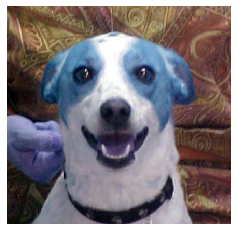

In [23]:
plt.imshow(img_test)
plt.axis('off')
plt.show()

In [24]:
test1 = cv2.resize(img_test,(224,224))
test1.shape

(224, 224, 3)

In [25]:
test1 = test1/255

In [26]:
test1 = test1.reshape(1,224,224,3)

In [27]:
target_names1 = {0:'cat',1:'dog'}

In [28]:
index = model.predict(test1).argmax()
target_names1[index]


'dog'